In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint

pd.options.display.max_rows = 60
pd.options.display.max_columns = 60


X = pd.read_csv("X")
y = pd.read_csv("y")

X.drop(columns=X.columns[0], axis=1, inplace=True)
y.drop(columns=y.columns[0], axis=1, inplace=True)
y = y.values.ravel()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def show_metrics(actual, predicted):
    confusion_matrix = metrics.confusion_matrix(y_val, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    accuracy = metrics.accuracy_score(actual, predicted)
    precision = metrics.precision_score(actual, predicted)
    recall = metrics.recall_score(actual, predicted)
    specificity = metrics.recall_score(actual, predicted, pos_label=0)
    f1_score = metrics.f1_score(actual, predicted)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")
    print(f"F1_score: {f1_score}")


### logistic regression

In [16]:
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)

C:\Users\David Powel\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
predicted = logr.predict(X_val)

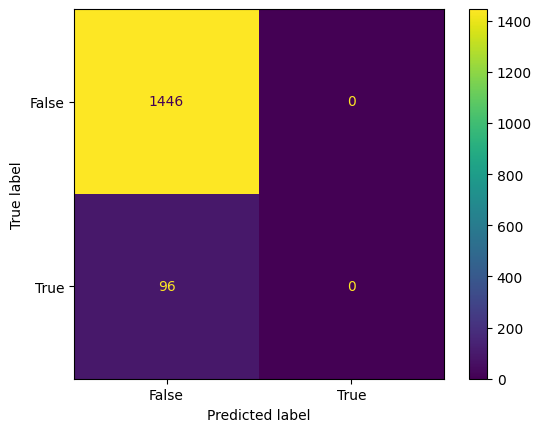

Accuracy: 0.9377431906614786
Precision: 0.0
Recall: 0.0
Specificity: 1.0
F1_score: 0.0


C:\Users\David Powel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
show_metrics(y_val, predicted)

### randomforest

In [19]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

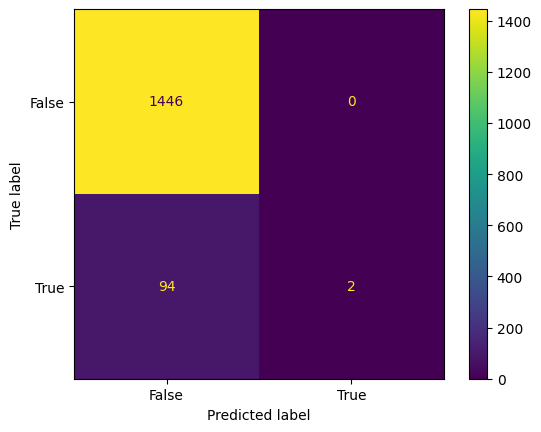

Accuracy: 0.9390402075226978
Precision: 1.0
Recall: 0.020833333333333332
Specificity: 1.0
F1_score: 0.04081632653061225


In [20]:
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred)

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [21]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

y_pred = best_rf.predict(X_val)
show_metrics(y_val, y_pred)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 417}


### sampling methods